<a href="https://colab.research.google.com/github/Raharijao/CMP-414/blob/main/midtermproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# (2) Load the training dataset as a Pandas DataFrame. 

In [ ]:
gdata = pd.read_csv("gender_submission.csv")
train_data = pd.read_csv("train.csv")


# (3) Obtain basic information of variables.

*   Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   survival Survival (0 = No; 1 = Yes)
*   name Name
*   sex Sex
*   age Age
*   sibsp Number of Siblings/Spouses Aboard
*   parch Number of Parents/Children Aboard
*   ticket Ticket Number
*   fare Passenger Fare (British pound)
*   cabin Cabin
*   embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) *italicized text*

In [ ]:
# Numerical summary
#Survived
print(train_data["Survived"].value_counts(ascending=False))
print("-"*20)
#Class
print(train_data["Pclass"].value_counts(ascending=False))
print("-"*20)
#Sex
print(train_data["Sex"].value_counts(ascending=False))
print("-"*20)
#Age
print(train_data["Age"].describe())
print("-"*20)
#Sibling
print(train_data["SibSp"].value_counts(sort=True))
print("-"*20)
#Parch
print(print(train_data["Parch"].value_counts(sort=True)))
print("-"*20)
#Fare
print(train_data["Fare"].describe())
print("-"*20)
#Embarked
print(train_data["Embarked"].value_counts(ascending=False))
print("-"*20)


0    549
1    342
Name: Survived, dtype: int64
--------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
--------------------
male      577
female    314
Name: Sex, dtype: int64
--------------------
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
--------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
--------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
None
--------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
--------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
--------------------


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b091e4ad0>,
      dtype=object)

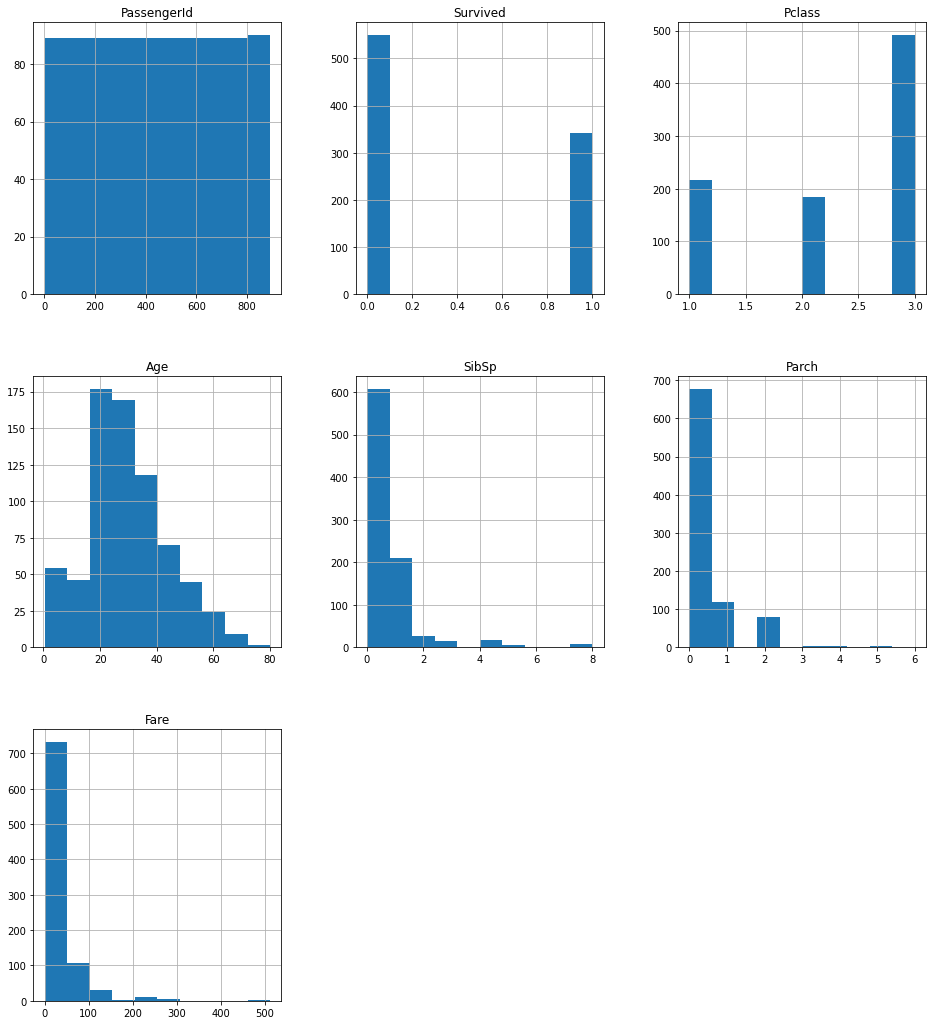

In [ ]:
#Graphical distributions of values
train_data.hist(figsize = (16,18))  

# (4) Data Cleaning

In [ ]:
#Remove all columns that contain more than 5% missing values.
for string in list(train_data) :
    k = train_data[string].isna().sum()
    if (k > (0.05 * len(train_data[string]))):
        train_data = train_data.drop(string, 1)
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [ ]:
#Delete rows with null values
t = train_data[train_data.isna().any(axis=1)].index.values.astype(int)
train_data = train_data.drop(axis = 0, index = t)

# (5) Variable Cleaning

In [ ]:
#Look at what correlates best with Survival
train_data = train_data.drop("Ticket", 1)
train_data.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,0.081656,0.016824,-0.548193
SibSp,-0.057686,-0.034040,0.081656,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.160887,0.217532,1.000000


Text(0, 0.5, 'Fare')

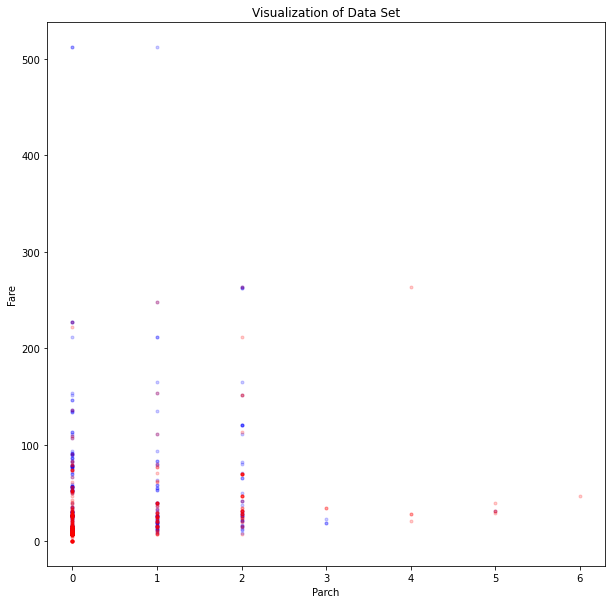

In [ ]:
#ploted them into a scatterplot graph

blue_pts = train_data[train_data['Survived'] == 1]
red_pts = train_data[train_data['Survived'] == 0]
plt.figure(figsize=(10,10))
plt.plot(blue_pts['Parch'], blue_pts['Fare'], 'b.', alpha=0.2)
plt.plot(red_pts['Parch'], red_pts['Fare'], 'r.', alpha=0.2)
plt.title('Visualization of Data Set')
plt.xlabel('Parch')
plt.ylabel('Fare')


In [ ]:
#Replace gender with 1 and 0
train_data['Sex'] = train_data['Sex'].replace(['male'],'0')
train_data['Sex'] = train_data['Sex'].replace(['female'],'1')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,0,0,8.0500,S


In [ ]:
#Categorical values (changing them)
train_data["Embarked_S"] = 0
train_data["Embarked_C"] = 0
train_data["Embarked_Q"] = 0

#Add 1 in appropriate column if row has a certain value
for n in train_data.index.values.astype(int):
    
    if train_data.loc[n, 'Embarked'] == "S":
        train_data.loc[n, 'Embarked_S'] = 1
    if train_data.loc[n, 'Embarked'] == "C":
        train_data.loc[n, 'Embarked_C'] = 1
    if train_data.loc[n, 'Embarked'] == "Q":
        train_data.loc[n, 'Embarked_Q'] = 1

#Dropped Embarked column
train_data = train_data.drop('Embarked', 1)
train_data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
886,887,0,2,"Montvila, Rev. Juozas",0,0,0,13.00,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,0,0,30.00,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,2,23.45,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",0,0,0,30.00,0,1,0
890,891,0,3,"Dooley, Mr. Patrick",0,0,0,7.75,0,0,1


In [ ]:
#Looks for people with non common titles (Dropped Name afterward)
train_data["RTitle"] = 0
titles = ["Mr.", "Mrs.", "Miss."]
for n in train_data.index.values.astype(int):
    st = train_data.loc[n, 'Name']
    if not any(ext in st for ext in titles):
        train_data.loc[n, "RTitle"] = 1
train_data = train_data.drop('Name', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
#Add a 1 to FreeL column if passenger payed 0 for ticket
train_data["FreeL"] = 0
for n in train_data.index.values.astype(int):
    st = train_data.loc[n, 'Fare']
    if st == 0:
        train_data.loc[n, "FreeL"] = 1
train_data.head()        

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,RTitle,FreeL
0,1,0,3,0,1,0,7.2500,1,0,0,0,0
1,2,1,1,1,1,0,71.2833,0,1,0,0,0
2,3,1,3,1,0,0,7.9250,1,0,0,0,0
3,4,1,1,1,1,0,53.1000,1,0,0,0,0
4,5,0,3,0,0,0,8.0500,1,0,0,0,0


In [ ]:
#Feature scaling all variables to a range of 0-1
scaler = MinMaxScaler()
train_data["Fare"] = scaler.fit_transform(train_data[["Fare"]])
train_data["Pclass"] = scaler.fit_transform(train_data[["Pclass"]])
train_data["SibSp"] = scaler.fit_transform(train_data[["SibSp"]])
train_data["Parch"] = scaler.fit_transform(train_data[["Parch"]])
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,RTitle,FreeL
0,1,0,1.0,0,0.125,0.0,0.014151,1,0,0,0,0
1,2,1,0.0,1,0.125,0.0,0.139136,0,1,0,0,0
2,3,1,1.0,1,0.000,0.0,0.015469,1,0,0,0,0
3,4,1,0.0,1,0.125,0.0,0.103644,1,0,0,0,0
4,5,0,1.0,0,0.000,0.0,0.015713,1,0,0,0,0


In [ ]:
#Test Something
train_data.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,RTitle,FreeL
PassengerId,1.000000,-0.005028,-0.035330,-0.057686,-0.001657,0.012703,0.022269,-0.001208,-0.033694,0.024321,0.035907
Survived,-0.005028,1.000000,-0.335549,-0.034040,0.083151,0.255290,-0.151777,0.169966,0.004536,0.082207,-0.085125
Pclass,-0.035330,-0.335549,1.000000,0.081656,0.016824,-0.548193,0.076466,-0.245733,0.220558,-0.070878,-0.059400
SibSp,-0.057686,-0.034040,0.081656,1.000000,0.414542,0.160887,0.069438,-0.060074,-0.026692,0.250626,-0.062254
Parch,-0.001657,0.083151,0.016824,0.414542,1.000000,0.217532,0.061512,-0.011588,-0.081585,0.165813,-0.062139
Fare,0.012703,0.255290,-0.548193,0.160887,0.217532,1.000000,-0.163758,0.270731,-0.116684,0.025193,-0.084656
Embarked_S,0.022269,-0.151777,0.076466,0.069438,0.061512,-0.163758,1.000000,-0.782613,-0.499261,-0.014643,0.080803
Embarked_C,-0.001208,0.169966,-0.245733,-0.060074,-0.011588,0.270731,-0.782613,1.000000,-0.148646,0.014570,-0.063238
Embarked_Q,-0.033694,0.004536,0.220558,-0.026692,-0.081585,-0.116684,-0.499261,-0.148646,1.000000,0.002982,-0.040342
RTitle,0.024321,0.082207,-0.070878,0.250626,0.165813,0.025193,-0.014643,0.014570,0.002982,1.000000,-0.004317


In [ ]:
#Extract Validation set
from sklearn.model_selection import train_test_split
tr_data, tst_data = train_test_split(train_data,test_size = 0.2)
tst_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 571 to 517
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  178 non-null    int64  
 1   Survived     178 non-null    int64  
 2   Pclass       178 non-null    float64
 3   Sex          178 non-null    object 
 4   SibSp        178 non-null    float64
 5   Parch        178 non-null    float64
 6   Fare         178 non-null    float64
 7   Embarked_S   178 non-null    int64  
 8   Embarked_C   178 non-null    int64  
 9   Embarked_Q   178 non-null    int64  
 10  RTitle       178 non-null    int64  
 11  FreeL        178 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 18.1+ KB


In [ ]:
#Logistical regression model
from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression()
Logmodel.fit(tr_data.loc[:, ['Parch',
                           'Fare',
                           'Embarked_C',
                           'RTitle',
                           'Embarked_Q']], tr_data['Survived'])

#Classification accuracy
from sklearn.metrics import accuracy_score

input_cols = ['Parch',
               'Fare',
               'Embarked_C',
               'RTitle',
               'Embarked_Q']

test_predictions = Logmodel.predict(tst_data.loc[:, input_cols])
print("Classification accuracy: ", accuracy_score(tst_data['Survived'], test_predictions))

#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(tst_data['Survived'], test_predictions)

#cross validation
from sklearn.model_selection import cross_val_score
print("Cross validation result: ",cross_val_score(Logmodel, tst_data[input_cols], tst_data['Survived'],cv=5))

# Display precision score
print("Precision score result: ",cross_val_score(Logmodel, tst_data[input_cols], tst_data['Survived'],
                      scoring="precision", cv=3))
# Display recall score
print("Recall score result: ",cross_val_score(Logmodel, tst_data[input_cols], tst_data['Survived'],
                      scoring="recall", cv=3))

Classification accuracy:  0.6179775280898876
Cross validation result:  [0.58333333 0.47222222 0.66666667 0.62857143 0.65714286]
Precision score result:  [0.54545455 0.5        0.6       ]
Recall score result:  [0.24 0.36 0.25]


In [ ]:
#K nearest neighbor

from sklearn.neighbors import KNeighborsClassifier
input_cols = ['Fare', 'RTitle']
model_nn = KNeighborsClassifier(n_neighbors=2)
model_nn.fit(tr_data[['Fare', 'Parch']], tr_data['Survived'])
tst_data['prediction'] = model_nn.predict(tst_data[input_cols])

# k = 3, 0.7134831460674157

#Classification accuracy

test_predictions = model_nn.predict(tst_data.loc[:, input_cols])
print("Classification accuracy: ", accuracy_score(tst_data['Survived'], test_predictions))

#Confusion matrix
confusion_matrix(tst_data['Survived'], test_predictions)

#cross validation
print("Cross validation result: ",cross_val_score(model_nn, tst_data[input_cols], tst_data['Survived'],cv=5))

# Display precision score
print("Precision score result: ",cross_val_score(model_nn, tst_data[input_cols], tst_data['Survived'],
                      scoring="precision", cv=3))
# Display recall score
print("Recall score result: ",cross_val_score(model_nn, tst_data[input_cols], tst_data['Survived'],
                      scoring="recall", cv=3))


Classification accuracy:  0.6348314606741573
Cross validation result:  [0.55555556 0.55555556 0.75       0.6        0.62857143]
Precision score result:  [0.44444444 0.66666667 0.5       ]
Recall score result:  [0.48       0.4        0.20833333]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- RTitle
Feature names seen at fit time, yet now missing:
- Parch

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- RTitle
Feature names seen at fit time, yet now missing:
- Parch

  warnings.warn(message, FutureWarning)


-The Knearest neighbor model seems to output better predictions than the logistical one, due to better prediction scores on the accuracy function and on the cross validation results.

-The amount of money the passenger paid seems to be a factor in their survival, as there is a strong correlation with the survival rate. This indicates wealth and status, which is why the Title variable can also be used to predict the survival. Entry through the Cherbourg Port of Embarkation also has a positive correlation with survival. 
